# Explorative Analysis of the Younger Dataset

In [74]:
import os
import pathlib
import networkx as nx
from tqdm import tqdm
import pickle as pkl

import matplotlib.pyplot as plt

from youngernns.data.network import Network

from collections import Counter

## Global Variables

In [75]:
DATA_PATH = os.path.join("..","data","filter_series_with_attributes_paper")
OUTPUT_DIR = os.path.join("..", "output")

## Loading Data

In [76]:
def get_graph_paths():
    # find all paths for network folders DATA_PATH/gaphd_id/network/
    graph_folders = []
    for root, dirs, files in os.walk(DATA_PATH):
        if 'network' in dirs:
            graph_folders.append(os.path.join(root, 'network'))
    return graph_folders

In [77]:
graph_paths = get_graph_paths()
print(f"Found {len(graph_paths)} graphs")
print(f"Example of first graph path: {graph_paths[0]}")

Found 7629 graphs
Example of first graph path: ../data/filter_series_with_attributes_paper/0ad2b9b313487b294428174cf56d7d22/network


Let's look at the first graph

In [78]:
NN = Network()
NN.load(pathlib.Path(graph_paths[0]))

In [79]:
NN.graph.nodes(data=True)["0"]

{'operator': {'op_type': 'Transpose', 'domain': ''},
 'attributes': {'perm': {'value': [0, 3, 1, 2],
   'doc_string': '',
   'attr_type': 7}},
 'features': {'operator': {'op_type': 'Transpose', 'domain': ''},
  'attributes': {'perm': (7, '[0, 3, 1, 2]')}}}

In [80]:
NN.graph.nodes(data=True)

NodeDataView({'0': {'operator': {'op_type': 'Transpose', 'domain': ''}, 'attributes': {'perm': {'value': [0, 3, 1, 2], 'doc_string': '', 'attr_type': 7}}, 'features': {'operator': {'op_type': 'Transpose', 'domain': ''}, 'attributes': {'perm': (7, '[0, 3, 1, 2]')}}}, '1': {'operator': {'op_type': 'Conv', 'domain': ''}, 'attributes': {'dilations': {'value': [1, 1], 'doc_string': '', 'attr_type': 7}, 'strides': {'value': [1, 1], 'doc_string': '', 'attr_type': 7}, 'kernel_shape': {'value': [3, 3], 'doc_string': '', 'attr_type': 7}, 'group': {'value': 1, 'doc_string': '', 'attr_type': 2}}, 'features': {'operator': {'op_type': 'Conv', 'domain': ''}, 'attributes': {'auto_pad': (3, "b'NOTSET'"), 'dilations': (7, '[1, 1]'), 'group': (2, '1'), 'kernel_shape': (7, '[3, 3]'), 'pads': (7, 'None'), 'strides': (7, '[1, 1]')}}}, '2': {'operator': {'op_type': 'Relu', 'domain': ''}, 'attributes': {}, 'features': {'operator': {'op_type': 'Relu', 'domain': ''}, 'attributes': {}}}, '3': {'operator': {'op_t

Let's look at the graph operators

In [81]:
def get_graph_operator_types(graph):
    for att in nx.get_node_attributes(graph, "operator").values():
        yield att['op_type'] 

In [82]:
operators_pickle_path = os.path.join(OUTPUT_DIR, "operator_types.pkl")

if not os.path.exists(operators_pickle_path):
    operator_types = []

    for graph_path in tqdm(graph_paths):
        NN = Network()
        NN.load(pathlib.Path(graph_path))
        operator_types.extend(get_graph_operator_types(NN.graph))

    if not os.path.exists(OUTPUT_DIR):
        os.makedirs(OUTPUT_DIR)

    with open(operators_pickle_path, "wb") as f:
        pkl.dump(operator_types, f)
    
    print(f"Saved {len(operator_types)} operator types")
    print(f"Saved to {operators_pickle_path}")
else:
    with open(operators_pickle_path, "rb") as f:
        operator_types = pkl.load(f)
        print(f"Loaded {len(operator_types)} operator types")

Loaded 12396579 operator types


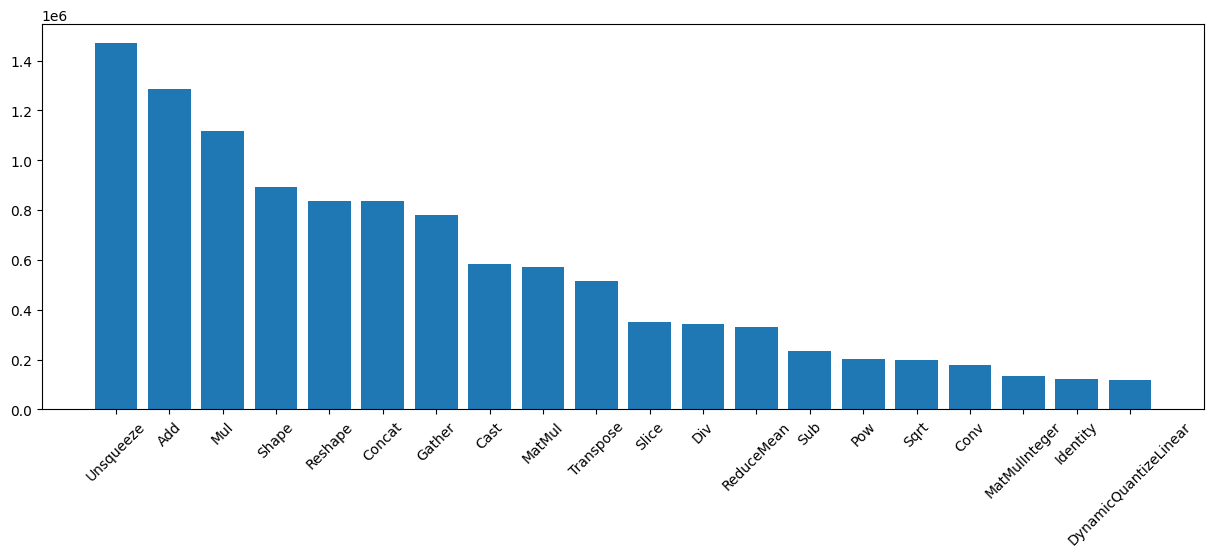

In [83]:
# plot histogram of top X operator types
operator_types_counter = Counter(operator_types)
top_x = 20
top_x_operator_types = operator_types_counter.most_common(top_x)

plt.figure(figsize=(15,5))
plt.bar([x[0] for x in top_x_operator_types], [x[1] for x in top_x_operator_types])
plt.xticks(rotation=45)
plt.show()

Let's look at the edges

In [84]:

for u, v, data in NN.graph.edges(data=True):
    print(f"Edge ({u}, {v}) has attributes {data}")

Edge (0, 1) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (1, 2) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (2, 3) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (3, 4) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (4, 5) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (5, 6) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (6, 7) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (7, 8) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (8, 9) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (9, 10) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (10, 11) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (11, 12) has attributes {'connection': {'emit_index': 0, 'trap_index': 0}}
Edge (12, 13) has attributes {'connection': {'emit_index': 

# Check for Graphs with No Nodes

In [85]:
empty_graph_idxs = []

# Find graphs with no nodes
for i, graph_path in tqdm(enumerate(graph_paths), total=len(graph_paths)):
    NN = Network()
    NN.load(pathlib.Path(graph_path))
    if len(NN.graph.nodes) == 0:
        empty_graph_idxs.append(i)

print(f"Found {len(empty_graph_idxs)} empty graph(s)")

100%|██████████| 7629/7629 [01:57<00:00, 64.99it/s] 

Found 1 empty graph(s)


In [86]:
print(empty_graph_idxs)

[1307]


Let's look at the empty graph

In [87]:
empty_graph = Network()
empty_graph.load(pathlib.Path(graph_paths[empty_graph_idxs[0]]))


In [88]:
empty_graph.graph.nodes(data=True)

NodeDataView({})

In [89]:
empty_graph.graph.edges(data=True)

OutEdgeDataView([])

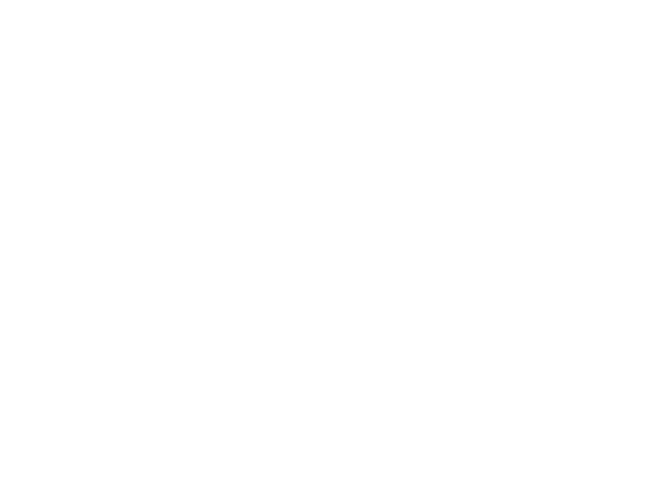

In [90]:
# plot the graph
nx.draw(empty_graph.graph, with_labels=True, font_weight='bold')

Let's remove it

In [91]:
print(f"Removing empty graph at index {empty_graph_idxs[0]}")
print(f"Number of graphs before: {len(graph_paths)}")
graph_paths.pop(empty_graph_idxs[0])
print(f"Number of graphs after: {len(graph_paths)}")

Removing empty graph at index 1307
Number of graphs before: 7629
Number of graphs after: 7628


## Check for Trees
Let's see how many of the graphs a trees.
A graph is a tree if it has a single root node and the in degree of all remaining nodes is one.
We do this because if a graph is a tree we might be able to do some things faster or use other algorithms.

In [92]:
# Save trees to tree_list and other to other_list
tree_idxs = [] 

for i, graph_path in tqdm(enumerate(graph_paths), total=len(graph_paths)):
    NN = Network()
    NN.load(pathlib.Path(graph_path))
    if nx.is_tree(NN.graph):
        tree_idxs.append(i)

print(f"Counted trees: {len(tree_idxs)}/{len(graph_paths)}")

100%|██████████| 7628/7628 [01:56<00:00, 65.24it/s] 

Counted trees: 498/7628


## Let's Analyize the Topology of the Graphs

### Depth Analysis

In [93]:
#Analyze depth of the graphs
depths = []
for graph_path in tqdm(graph_paths):
    NN = Network()
    NN.load(pathlib.Path(graph_path))
    depths.append(nx.dag_longest_path_length(NN.graph))

 49%|████▊     | 3704/7628 [01:24<01:01, 63.72it/s] Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7dd88d2873b0>>
Traceback (most recent call last):
  File "/home/wdm/YoungerNNs/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
100%|██████████| 7628/7628 [03:16<00:00, 38.80it/s]


In [94]:
print(f"Max depth: {max(depths)}")
print(f"Min depth: {min(depths)}")

Max depth: 38414
Min depth: 0


In [103]:
# Count depths
depth_counter = Counter(depths)

# sort depths descending
depths_keys = list(depth_counter.keys())
depths_keys.sort(reverse=True)

# print top X max depths
top_x = 10
top_x_depths = depths_keys[:top_x]

for dpt in top_x_depths:
    print(f"Depth {dpt}: {depth_counter[dpt]}")

Depth 38414: 1
Depth 21961: 1
Depth 21173: 1
Depth 6854: 1
Depth 6848: 1
Depth 6840: 1
Depth 6834: 1
Depth 6396: 1
Depth 6394: 1
Depth 6392: 2


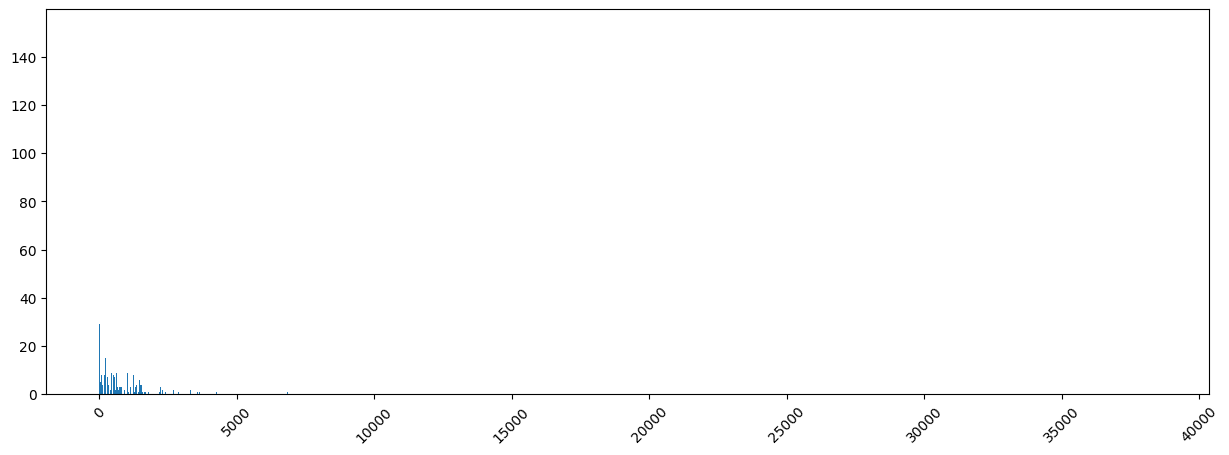

In [113]:
# Plot depth distribution
plt.figure(figsize=(15,5))
plt.bar(*zip(*sorted(depth_counter.items())))
plt.xticks(rotation=45)
plt.show()

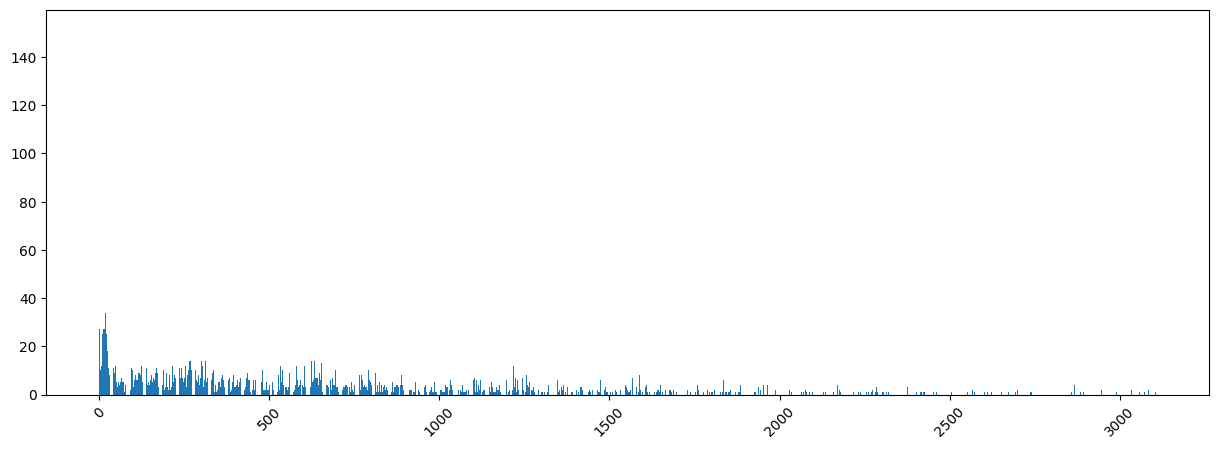

In [117]:
# Plot X first depth count distribution
X = 1750
plt.figure(figsize=(15,5))
plt.bar(*zip(*sorted(depth_counter.items())[:X]))
plt.xticks(rotation=45)
plt.show()

### Width Analysis

In [124]:
# Analyze width of the graphs
widths = []
for graph_path in tqdm(graph_paths):
    NN = Network()
    NN.load(pathlib.Path(graph_path))

    # Find the number of children for each node
    children = {node: 0 for node in NN.graph.nodes}

    for u, v, data in NN.graph.edges(data=True):
        children[v] += 1

    widths.extend(list(children.values()))

100%|██████████| 7628/7628 [02:05<00:00, 60.75it/s] 


In [126]:
# Count depths
width_counter = Counter(widths)

# sort depths descending
widths_keys = list(width_counter.keys())
widths_keys.sort(reverse=True)

# print top X max depths
top_x = 10
top_x_widths = widths_keys[:top_x]

for wdt in top_x_widths:
    print(f"Width {wdt}: {width_counter[wdt]}")

Width 5278: 5
Width 5000: 5
Width 100: 2
Width 90: 31
Width 80: 27
Width 64: 34
Width 53: 5
Width 49: 2
Width 48: 74
Width 47: 2


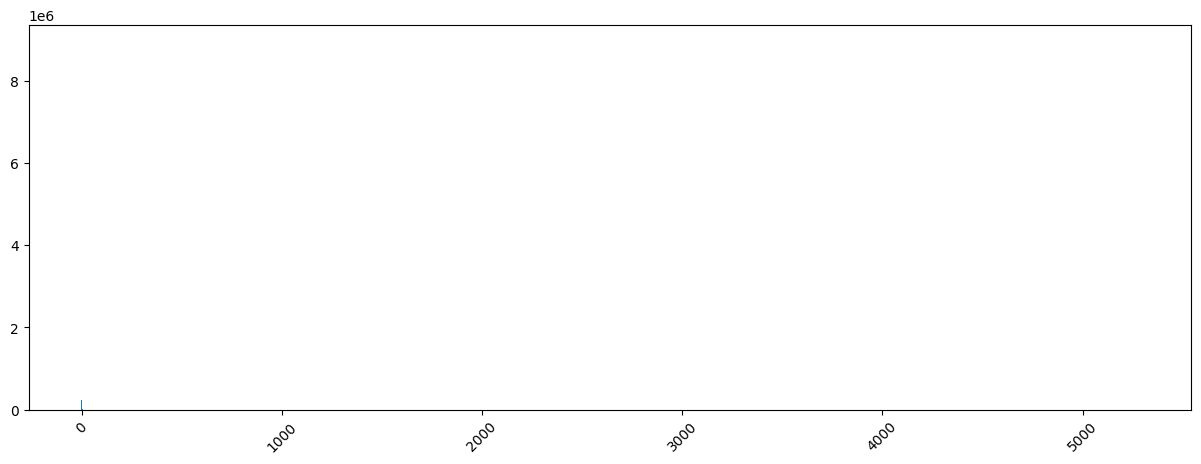

In [127]:
# Plot depth distribution
plt.figure(figsize=(15,5))
plt.bar(*zip(*sorted(width_counter.items())))
plt.xticks(rotation=45)
plt.show()

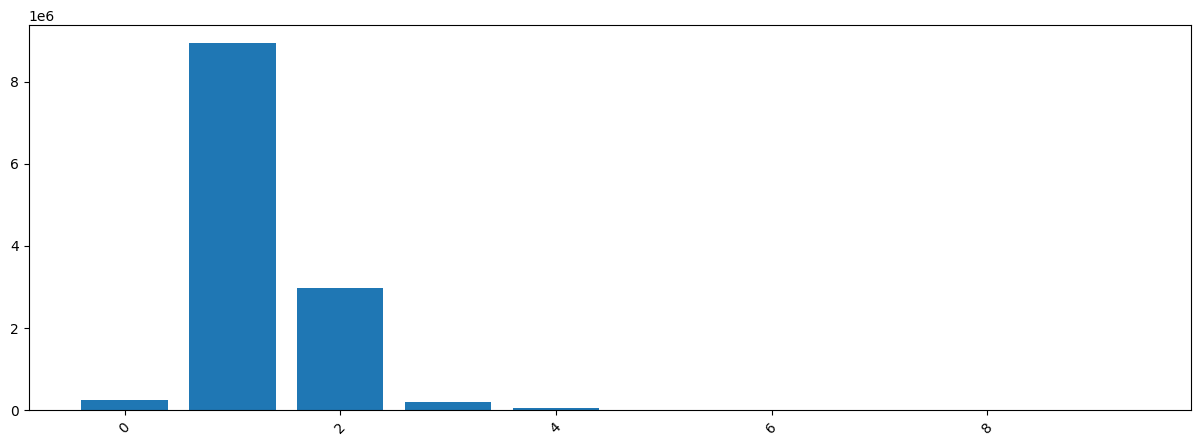

In [140]:
# Plot X first depth count distribution
X = 10
plt.figure(figsize=(15,5))
plt.bar(*zip(*sorted(width_counter.items())[:X]))
plt.xticks(rotation=45)
plt.show()